In [1]:
import numpy as np
# ImageDataGenerator is used to generate multiple data from 1 single picture (eg. cropping,shrinking,zooming,flipping the data)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
# Dropout is used to prevent overfitting of NN
# Flatten is used to convert 2D to 1D
from keras.layers import Conv2D,MaxPooling2D,Activation,Dense,Flatten,Dropout
from keras import backend as k
from keras_preprocessing import image
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# dimensions of out image
img_width,img_height = 150,150

In [3]:
train_data_dir = '/Users/utkarsh/Downloads/Dataset-2/Training'
validation_data_dir = '/Users/utkarsh/Downloads/Dataset-2/Validation'

In [4]:
nb_train_samples = 500
nb_validation_samples = 200
epochs = 30
batch_size = 32

In [5]:
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

In [8]:
#train_datagen = ImageDataGenerator(rescale=1.0/255.,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
train_datagen = ImageDataGenerator(rescale=1.0/255.)

In [9]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)

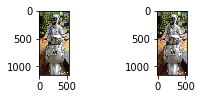

In [39]:
import matplotlib.pyplot as plt
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

img = load_img('/Users/utkarsh/Downloads/WhatsApp Unknown 2020-09-19 at 8.22.30 PM/anuja_without_helmet.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

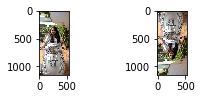

In [40]:
img = load_img('/Users/utkarsh/Downloads/WhatsApp Unknown 2020-09-19 at 8.22.30 PM/maithilee_without_helmet.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(vertical_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

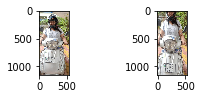

In [41]:
img = load_img('/Users/utkarsh/Downloads/WhatsApp Unknown 2020-09-19 at 8.22.30 PM/maithilee_with_helmet.jpeg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
# plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 318 images belonging to 2 classes.


In [14]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 153 images belonging to 2 classes.


In [15]:
train_generator.class_indices

{'neg': 0, 'pos': 1}

In [16]:
validation_generator.class_indices

{'with_helmet': 0, 'without_helmet': 1}

In [17]:
# building the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
%%timeit

history = model.fit_generator(
    train_generator,
    verbose = 1,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/30
15/15 [==============================] - 11s 705ms/step - loss: 0.6918 - accuracy: 0.6366 - val_loss: 0.6951 - val_accuracy: 0.5189
Epoch 2/30
15/15 [==============================] - 10s 649ms/step - loss: 0.6328 - accuracy: 0.6998 - val_loss: 0.7153 - val_accuracy: 0.5135
Epoch 3/30
15/15 [==============================] - 10s 640ms/step - loss: 0.5948 - accuracy: 0.7101 - val_loss: 0.7149 - val_accuracy: 0.5351
Epoch 4/30
15/15 [==============================] - 10s 676ms/step - loss: 0.5865 - accuracy: 0.7103 - val_loss: 0.6979 - val_accuracy: 0.5297
Epoch 5/30
15/15 [==============================] - 10s 665ms/step - loss: 0.6376 - accuracy: 0.7048 - val_loss: 0.6908 - val_accuracy: 0.5169
Epoch 6/30
15/15 [==============================] - 10s 640ms/step - loss: 0.5466 - accuracy: 0.7144 - val_loss: 0.8282 - val_accuracy: 0.5189
Epoch 7/30
15/15 [==============================] - 10s 648ms/step - loss: 0.4965 - accuracy: 0.7103 - val_loss: 0.9865 - val_accuracy: 0.5189

15/15 [==============================] - 12s 777ms/step - loss: 0.0760 - accuracy: 0.9748 - val_loss: 3.9022 - val_accuracy: 0.3757
Epoch 29/30
15/15 [==============================] - 11s 725ms/step - loss: 0.0854 - accuracy: 0.9695 - val_loss: 5.8213 - val_accuracy: 0.3541
Epoch 30/30
15/15 [==============================] - 12s 784ms/step - loss: 0.0721 - accuracy: 0.9833 - val_loss: 9.8287 - val_accuracy: 0.2949
Epoch 1/30
15/15 [==============================] - 11s 756ms/step - loss: 0.0784 - accuracy: 0.9665 - val_loss: 7.8814 - val_accuracy: 0.3432
Epoch 2/30
15/15 [==============================] - 12s 791ms/step - loss: 0.0754 - accuracy: 0.9748 - val_loss: 5.7291 - val_accuracy: 0.3676
Epoch 3/30
15/15 [==============================] - 11s 744ms/step - loss: 0.0675 - accuracy: 0.9780 - val_loss: 6.4393 - val_accuracy: 0.3081
Epoch 4/30
15/15 [==============================] - 12s 769ms/step - loss: 0.0801 - accuracy: 0.9769 - val_loss: 7.3272 - val_accuracy: 0.3946
Epoch 5/

15/15 [==============================] - 12s 794ms/step - loss: 0.0513 - accuracy: 0.9769 - val_loss: 5.0986 - val_accuracy: 0.2893
Epoch 26/30
15/15 [==============================] - 11s 741ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 9.3336 - val_accuracy: 0.3162
Epoch 27/30
15/15 [==============================] - 12s 791ms/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 9.5585 - val_accuracy: 0.2784
Epoch 28/30
15/15 [==============================] - 12s 787ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 7.3385 - val_accuracy: 0.3595
Epoch 29/30
15/15 [==============================] - 12s 811ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 7.9387 - val_accuracy: 0.3189
Epoch 30/30
15/15 [==============================] - 12s 813ms/step - loss: 0.0131 - accuracy: 0.9979 - val_loss: 9.3518 - val_accuracy: 0.3118
Epoch 1/30
15/15 [==============================] - 12s 781ms/step - loss: 0.0338 - accuracy: 0.9863 - val_loss: 9.5227 - val_accuracy: 0.3351
Epoch

Epoch 22/30
15/15 [==============================] - 15s 985ms/step - loss: 0.0224 - accuracy: 0.9947 - val_loss: 7.1705 - val_accuracy: 0.3622
Epoch 23/30
15/15 [==============================] - 15s 1s/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 7.3627 - val_accuracy: 0.3135
Epoch 24/30
15/15 [==============================] - 13s 885ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 7.4664 - val_accuracy: 0.2703
Epoch 25/30
15/15 [==============================] - 14s 923ms/step - loss: 0.0216 - accuracy: 0.9906 - val_loss: 11.5594 - val_accuracy: 0.3090
Epoch 26/30
15/15 [==============================] - 13s 879ms/step - loss: 0.0172 - accuracy: 0.9926 - val_loss: 11.5746 - val_accuracy: 0.2973
Epoch 27/30
15/15 [==============================] - 12s 819ms/step - loss: 0.0106 - accuracy: 0.9948 - val_loss: 11.3259 - val_accuracy: 0.3297
Epoch 28/30
15/15 [==============================] - 13s 837ms/step - loss: 0.0216 - accuracy: 0.9905 - val_loss: 9.4080 - val_accuracy:

Epoch 19/30
15/15 [==============================] - 12s 787ms/step - loss: 0.0129 - accuracy: 0.9916 - val_loss: 12.3565 - val_accuracy: 0.3838
Epoch 20/30
15/15 [==============================] - 12s 818ms/step - loss: 0.0513 - accuracy: 0.9822 - val_loss: 17.5353 - val_accuracy: 0.3455
Epoch 21/30
15/15 [==============================] - 11s 736ms/step - loss: 0.0268 - accuracy: 0.9853 - val_loss: 9.8170 - val_accuracy: 0.3432
Epoch 22/30
15/15 [==============================] - 12s 791ms/step - loss: 0.1707 - accuracy: 0.9833 - val_loss: 4.9381 - val_accuracy: 0.3622
Epoch 23/30
15/15 [==============================] - 12s 788ms/step - loss: 0.0281 - accuracy: 0.9884 - val_loss: 10.2105 - val_accuracy: 0.3324
Epoch 24/30
15/15 [==============================] - 13s 840ms/step - loss: 0.0587 - accuracy: 0.9864 - val_loss: 6.4203 - val_accuracy: 0.3297
Epoch 25/30
15/15 [==============================] - 12s 784ms/step - loss: 0.0286 - accuracy: 0.9874 - val_loss: 8.5773 - val_accura

In [42]:
#model.save('helmet_model_new.h5')

In [34]:
from keras.preprocessing.image import load_img, img_to_array

img_pred = load_img('/Users/utkarsh/Downloads/WhatsApp Unknown 2020-09-19 at 8.22.30 PM/maithilee_with_helmet.jpeg',target_size=(150,150))
img_pred = img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0) #channels_first as axis=0

In [35]:
result = model.predict(img_pred)
print(result)

train_generator.class_indices

[[0. 1.]]


{'neg': 0, 'pos': 1}